# 1

A **classification decision tree** is a type of machine learning algorithm used for classifying data into distinct categories. It is a flowchart-like structure where an internal node represents a "test" or "decision" on a feature (e.g., whether an attribute meets a particular condition), each branch represents the outcome of the test, and each leaf node represents a class label or the decision made after computing all previous decisions.

(a). Classification decision trees are commonly used to solve problems where the goal is to categorize data into predefined classes or groups based on input features. Some real-life applications for this are spam emails filter, medical diagnosis, customer segmentation, fraud detection, credit risk assesment, and sentiment analysis on social media messages.

(b). For each node on the classification decision tree (except leaf nodes), it tries to select a feature that best divides the data into two so that it can go further down into the tree. Because of that, the tree handles complex, non-linear relationships between input features without making assumptions about the underlying data distribution. While multiple linear regression  sssumes a linear relationship between input features and output. It tries to find the best-fitting line/plane that explains the relationship between variables. The structure of multiple linear regression is a line/hyperplane, while the structure of a classification decision tree is, well, a tree.

# 2

1. For **Accuracy**, predicting whether a student will pass or fail a course based on various factors is a good real life example of this metric application. If the dataset is relatively balanced (i.e., similar numbers of students passing and failing), accuracy gives a good sense of how often the model correctly predicts whether a student will pass or fail. It offers a straightforward overall measure of model performance in a balanced setting.
2. For **Sensitivity**, screening test for a life-threatening disease, such as cancer, is a good real life example of this metric application, because in this context, missing a positive case (false negative) could have severe consequences, such as delaying critical treatment. High sensitivity ensures that as many actual cases of cancer are detected as possible, even if it means catching some false positives. This minimizes the chance of missing someone with the disease.
3. For **Specificity**, testing for a rare disease in a general population where most people are healthy is a good real life example of this metric application, because high specificity minimize the number of healthy individuals that are incorrectly diagnosed as having the disease (i.e., minimizing false positives). This prevents unnecessary stress, additional testing, and costs for those who are actually healthy. It's particularly valuable when the disease is rare and false positives are a major concern.
4. For **Precision**, email spam filter that classifies emails as spam or not spam is a good real life example of this metric application. High precision means that when an email is marked as spam, there is a high probability it truly is spam, thereby reducing false positives. This is important because wrongly classifying legitimate emails (false positives) as spam can lead to important messages being missed by the user. Precision is particularly valuable in scenarios where false positives have high consequences, such as critical business communications.

# 3

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab.drop(['Weight_oz', 'Width', 'Height'], axis=1, inplace=True)

ab_reduced_noNaN = ab.dropna()

ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [3]:
ab_reduced_noNaN['NumPages'].astype('int64')
ab_reduced_noNaN['Pub year'].astype('int64')
ab_reduced_noNaN['Hard_or_Paper'].astype('category')
ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [4]:
ab_reduced_noNaN.describe()

,List Price,Amazon Price,NumPages,Pub year,Thick
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,18.362978,12.941034,334.272727,2002.175549,0.903448
std,13.976755,12.436673,161.601510,10.646133,0.365261
min,1.500000,0.770000,24.000000,1936.000000,0.100000
25%,13.890000,8.600000,208.000000,1998.000000,0.600000
50%,15.000000,10.200000,320.000000,2005.000000,0.900000
75%,19.360000,12.560000,416.000000,2010.000000,1.100000
max,139.950000,139.950000,896.000000,2011.000000,2.100000


In [5]:
# i tried to use include='category' but it somehow return an error :<
ab_reduced_noNaN.describe(include='all')
# wait i just realised there are multiple books with the same name. coincidence?
# oh wow there's even multiple books with same ISBN number. how

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
count,319,319,319.000000,319.000000,319,319.000000,319,319.000000,319,319.000000
unique,309,251,NaN,NaN,2,NaN,158,NaN,316,NaN
top,The Great Gatsby,Jodi Picoult,NaN,NaN,P,NaN,Vintage,NaN,743273567,NaN
freq,3,7,NaN,NaN,233,NaN,37,NaN,2,NaN
mean,NaN,NaN,18.362978,12.941034,NaN,334.272727,NaN,2002.175549,NaN,0.903448
std,NaN,NaN,13.976755,12.436673,NaN,161.601510,NaN,10.646133,NaN,0.365261
min,NaN,NaN,1.500000,0.770000,NaN,24.000000,NaN,1936.000000,NaN,0.100000
25%,NaN,NaN,13.890000,8.600000,NaN,208.000000,NaN,1998.000000,NaN,0.600000
50%,NaN,NaN,15.000000,10.200000,NaN,320.000000,NaN,2005.000000,NaN,0.900000
75%,NaN,NaN,19.360000,12.560000,NaN,416.000000,NaN,2010.000000,NaN,1.100000


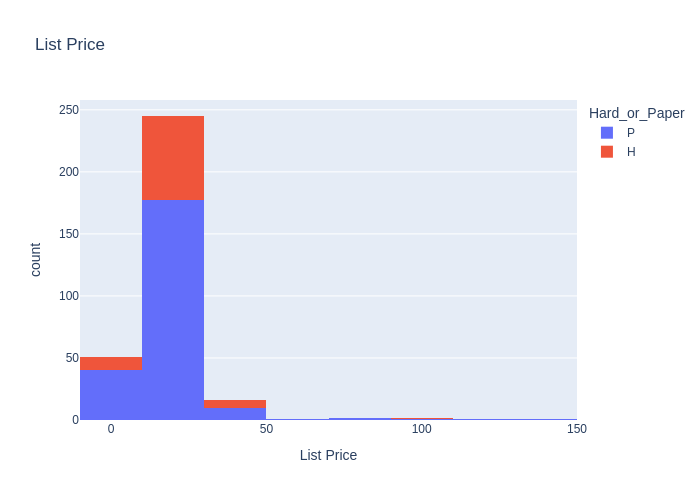

In [6]:
import plotly.express as px

# List price according to Hard or Paper category
fig = px.histogram(ab_reduced_noNaN, x="List Price", color='Hard_or_Paper', nbins=8, title='List Price')
fig.show(renderer='png')

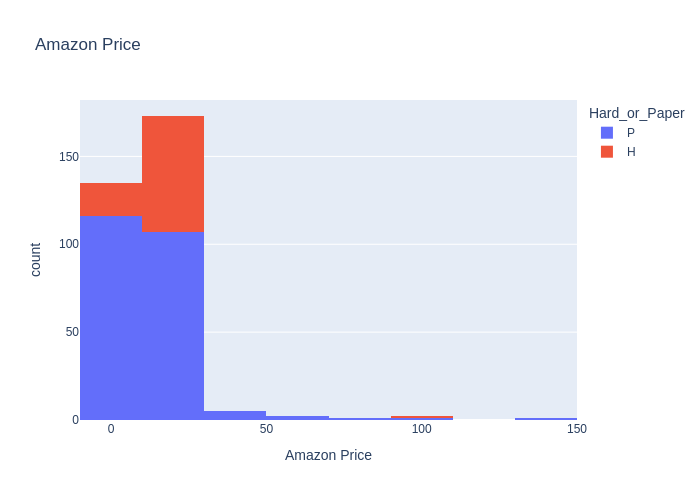

In [7]:
# Amazon price according to Hard or Paper category
fig = px.histogram(ab_reduced_noNaN, x="Amazon Price", color='Hard_or_Paper', nbins=8, title='Amazon Price')
fig.show(renderer='png')

/tmp/ipykernel_180/271699007.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



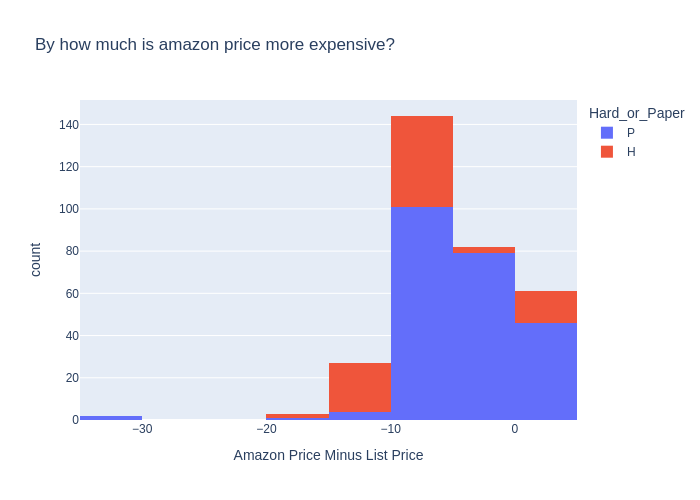

In [8]:
ab_reduced_noNaN['Amazon Price Minus List Price'] = ab_reduced_noNaN['Amazon Price'] - ab_reduced_noNaN['List Price']

# Amazon - List according to Hard or Paper category
fig = px.histogram(ab_reduced_noNaN, x="Amazon Price Minus List Price", color='Hard_or_Paper', nbins=8, title='By how much is \
amazon price more expensive?')
fig.show(renderer='png')

# 4

In [9]:
# whoops, i thought the name is ab_train, not ab_reduced_noNaN_train
# sowwy, i liek simplicity :3
ab_train, ab_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=130)

print(f"ab_train observation count: {ab_train.shape[0]}")
print(f"ab_test observation count: {ab_test.shape[0]}")

ab_train observation count: 255
ab_test observation count: 64


In [10]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

For this specific code above, the first line converts the categorical column `"Hard_or_Paper"` from the `ab_reduced_noNaN` DataFrame into a binary variable (`y`) for classification, where it is `1` if `H` and `0` otherwise. The second line creates the feature matrix (`X`) for the model by selecting the `"List Price"` column. Overall, the code is preparing input and output for a prediction model. Although, if we use `train_test_split` to split the data into training data and testing data, we're not gonna be using the code above. Instead, we're gonna use the code below.

In [11]:
y_train = pd.get_dummies(ab_train["Hard_or_Paper"])['H']
X_train = ab_train[['List Price']]
y_test = pd.get_dummies(ab_test["Hard_or_Paper"])['H']
X_test = ab_test[['List Price']]

# Fitting the decision tree model with max_depth=2
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

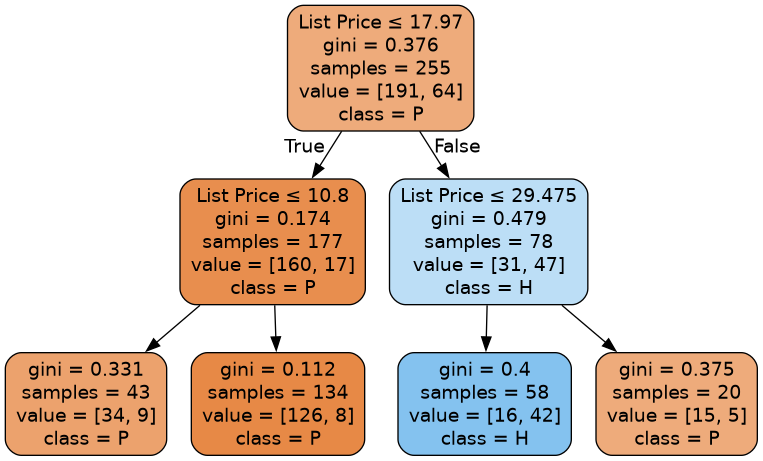

In [12]:
from graphviz import Source
from IPython.display import Image

# Assuming 'clf' is your fitted DecisionTreeClassifier
dot_data = tree.export_graphviz(
    clf,
    out_file=None,  # Do not save to file
    feature_names=['List Price'],  # Name of the input feature
    class_names=['P', 'H'],  # Target classes
    filled=True,  # Add colors to the nodes
    rounded=True,  # Rounded corners for aesthetics
    special_characters=True  # Support special characters
)

# Create a Source object from DOT data and render it as PNG
graph = Source(dot_data)
graph.format = 'png'  # Set format to PNG
graph.render("decision_tree_image", cleanup=True)  # Render the image and remove the DOT file

# Display the decision tree image inline in the notebook
Image(filename='decision_tree_image.png')

ChatGPT summary for q1-q4: https://chatgpt.com/share/673e532f-2a10-8012-88aa-e16056db1fdc

# 5

In [13]:
X2_train = ab_train[['NumPages', 'Thick', 'List Price']]
X2_test = ab_test[['NumPages', 'Thick', 'List Price']]

# Create and train the decision tree classifier
clf2 = tree.DecisionTreeClassifier(max_depth=4)
clf2.fit(X2_train, y_train)

DecisionTreeClassifier(max_depth=4)

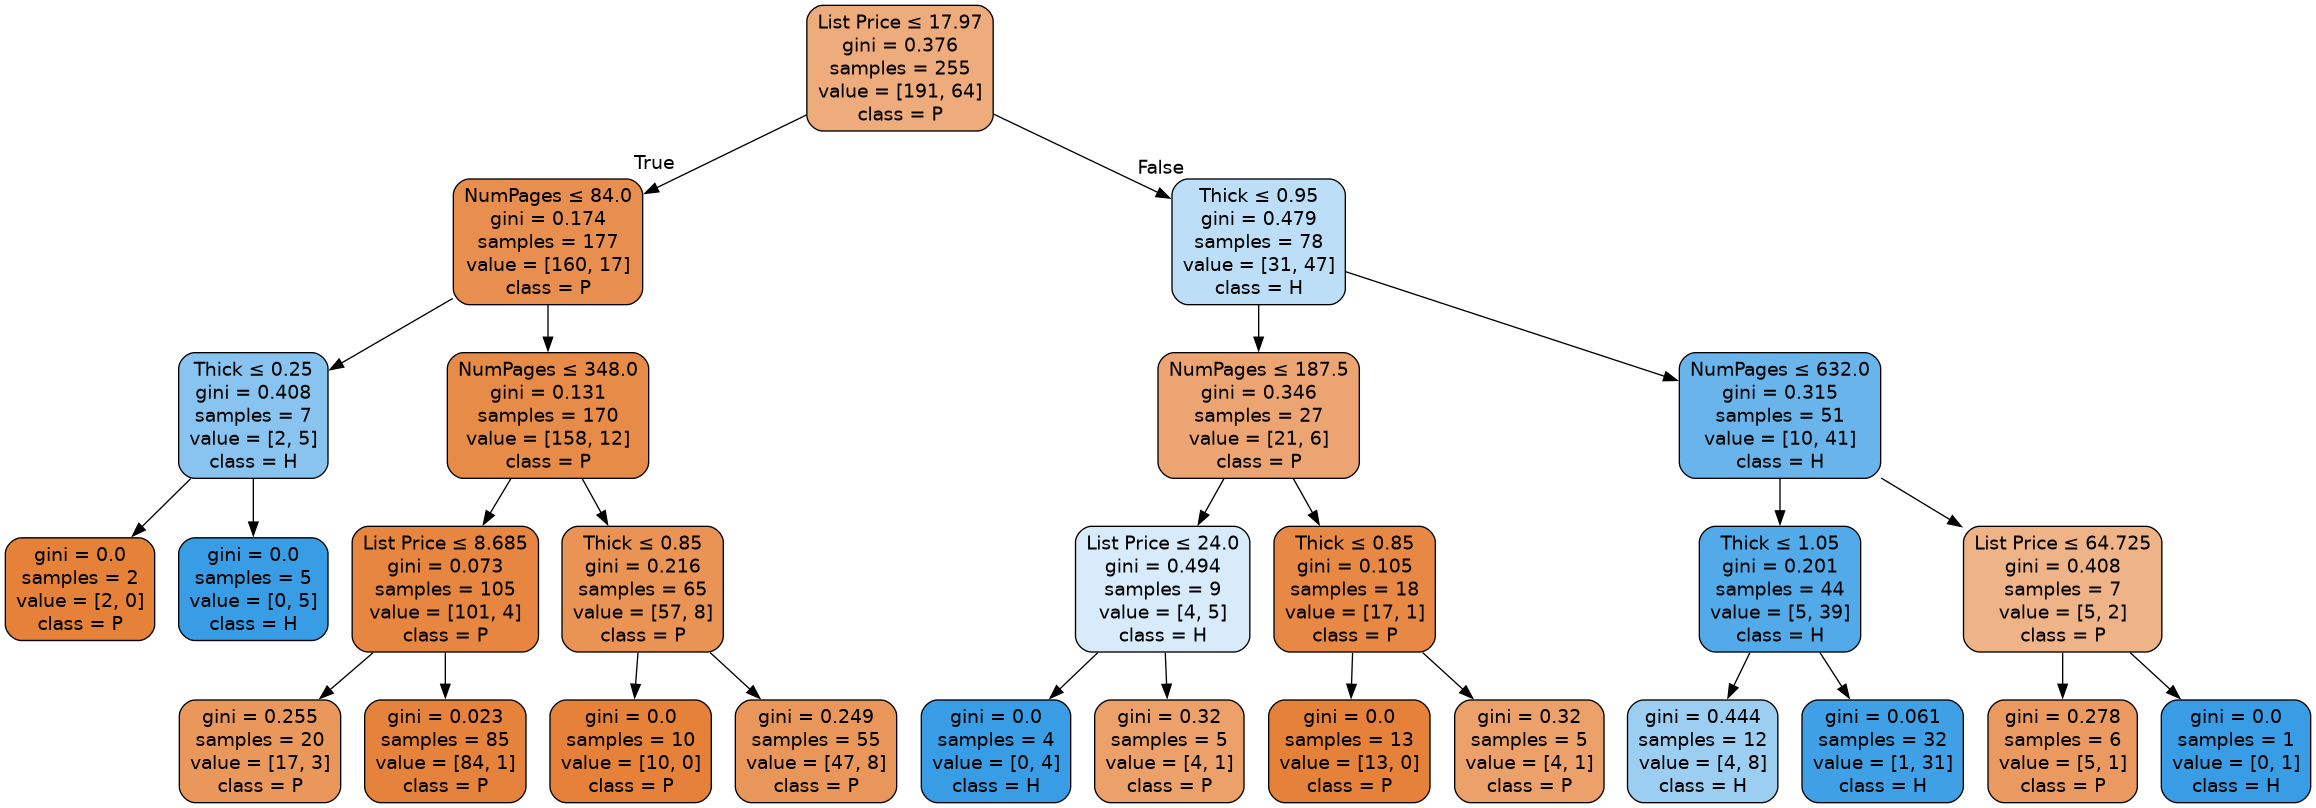

In [14]:
# Assuming 'clf2' is your fitted DecisionTreeClassifier
dot_data = tree.export_graphviz(
    clf2,
    out_file=None,  # Do not save to file
    feature_names=['NumPages', 'Thick', 'List Price'],  # Name of the input feature
    class_names=['P', 'H'],  # Target classes
    filled=True,  # Add colors to the nodes
    rounded=True,  # Rounded corners for aesthetics
    special_characters=True  # Support special characters
)

# Create a Source object from DOT data and render it as PNG
graph = Source(dot_data)
graph.format = 'png'  # Set format to PNG
graph.render("decision_tree_image_2", cleanup=True)  # Render the image and remove the DOT file

# Display the decision tree image inline in the notebook
Image(filename='decision_tree_image_2.png')

A decision tree makes predictions by following a sequence of decisions based on the feature values in the input data. The tree starts at the root node (top of the tree). This node contains the entire dataset. At each node, the algorithm selects the feature that best splits the data into subsets based on some criterion (such as Gini impurity or entropy for classification, or mean squared error for regression). The criterion is chosen to maximize the separation between different classes (or values, in regression).

For each node, a decision rule is applied using one of the features. For example, If the feature is `NumPage`s and the rule is `"NumPages <= 100"`, then:
- Data with `NumPages` less than or equal to `100` goes to the left child node.
- Data with `NumPages` greater than `100` goes to the right child node.

The tree continues to split the data based on the features, following a series of "if-else" conditions.

Eventually, the data reaches a leaf node. A leaf node contains the predicted class. The prediction for that leaf is typically the majority class of the data that reached that leaf. For example, in a classification tree, the leaf might say "Class A" if most of the data that reaches that leaf belong to Class A.

# 6

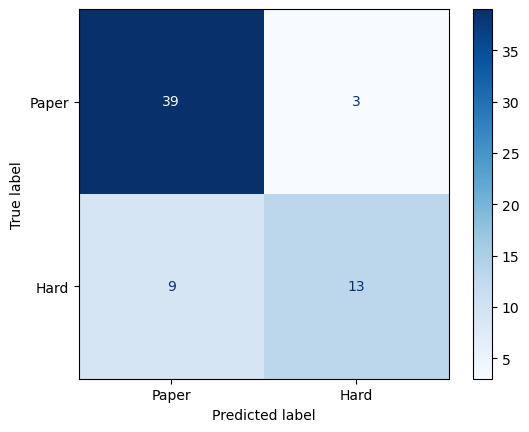

In [15]:
# Step 4: Make predictions on the test data
y_pred = clf.predict(X_test)

display_labels = ["Paper", "Hard"]

# Step 5: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 1 is H and 0 is P
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap="Blues")  # Optional: Choose a color map

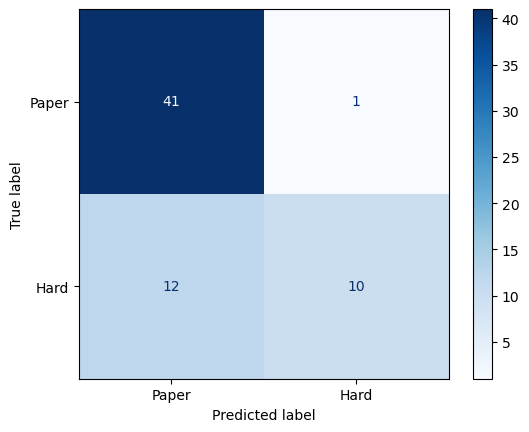

In [16]:
# Step 4: Make predictions on the test data
y2_pred = clf2.predict(X2_test)

# Step 5: Compute the confusion matrix
cm = confusion_matrix(y_test, y2_pred)

# 1 is H and 0 is P
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap="Blues")  # Optional: Choose a color map

Here, "Positive" is "Hard" and "Negative" is "Paper":

- `clf` Accuracy: $\frac{TP + TN}{TP + TN + FP + FN} = \frac{13 + 39}{13 + 39 + 3 + 9} = \frac{52}{64} = 0.8125$
- `clf` Sensitivity: $\frac{TP}{TP + FN} = \frac{13}{13 + 9} = \frac{13}{22} \approx 0.5909$
- `clf` Specificity: $\frac{TN}{TN + FP} = \frac{39}{39 + 3} = \frac{39}{42} \approx 0.9286$
- `clf2` Accuracy: $\frac{TP + TN}{TP + TN + FP + FN} = \frac{10 + 41}{10 + 41 + 1 + 12} = \frac{51}{64} \approx 0.7969$
- `clf2` Sensitivity: $\frac{TP}{TP + FN} = \frac{10}{10 + 12} = \frac{10}{22} \approx 0.4545$
- `clf2` Specificity: $\frac{TN}{TN + FP} = \frac{41}{41 + 1} = \frac{41}{42} \approx 0.9762$

# 7

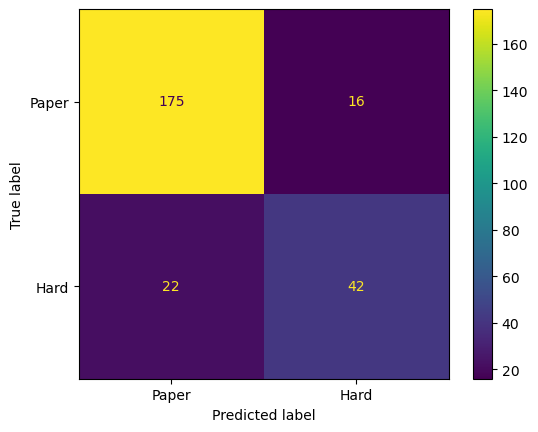

In [17]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf.predict(ab_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

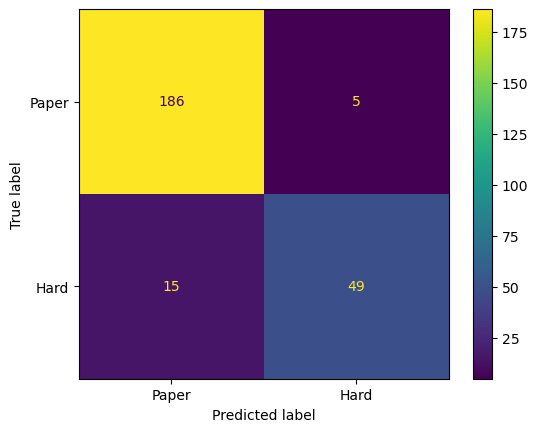

In [19]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf2.predict(ab_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The previous confusion matrix for `clf` (not the above ones) evaluates how well the model generalizes to unseen data, since it's using the test data to compare in the confusion matrix. The above one, however, evaluates the model’s ability to fit the training data. The previous confusion matrix before the above one is better because it shows how well the model works on new data (which is what machine learning generally aim for), while the above one is just to see the accuracy of the model with previously given data. Same goes for the `clf2` counterpart.

# 8

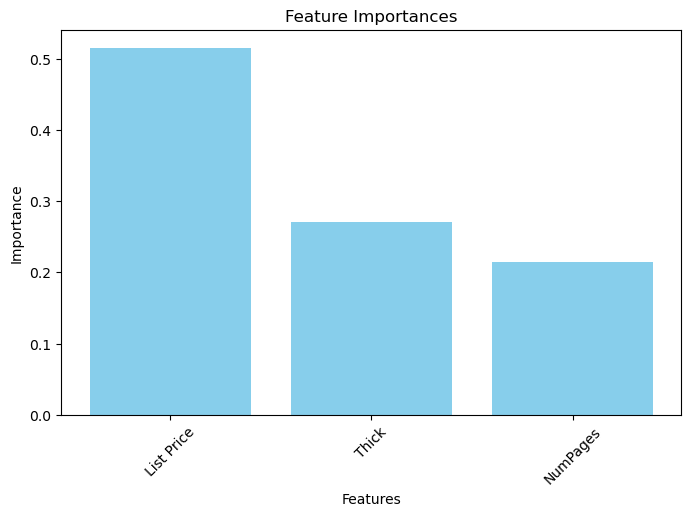

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature importances
importances = clf2.feature_importances_

# Feature names (replace with the names of your actual features)
feature_names = X2_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Access feature importances and feature names
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Report the most important feature
most_important_feature = importance_df.iloc[0]

# Display the most important feature
print(f"The most important predictor variable is: {most_important_feature['Feature']} with an importance score of {most_important_feature['Importance']:.4f}")


The most important predictor variable is: List Price with an importance score of 0.5149


ChatGPT summary for q5-q8: https://chatgpt.com/share/673ec26e-c158-8012-aaa9-1592a97fed80

# 9

In linear regression, the coefficients have a direct and additive influence, with global influence across the dataset and direct effect on the outcome. On the other hand, feature importances in decision tree have a relative influence, with local influence across each split and effects relative to each other (not direct).

# 10

I have, but I might need to review it again, just because I need to sharpen my memory on prior materials.